In [1]:
%pip install -r ../requirements.txt
# %pip install kaggle
# !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p ../Dataset/

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [3]:
import neattext.functions as nfx

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import zipfile

from bs4 import BeautifulSoup
from langdetect import detect
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from urllib.parse import urlsplit
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Specify the path to the ZIP file
zip_file_path = r"../Datasets/imdb-dataset-of-50k-movie-reviews.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Find the first file with a .csv extension (assuming it's the one you want)
    csv_file = [name for name in zip_ref.namelist() if name.endswith('.csv')][0]
    
    # Read the CSV file directly from the ZIP archive into a DataFrame
    df = pd.read_csv(zip_ref.open(csv_file))

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

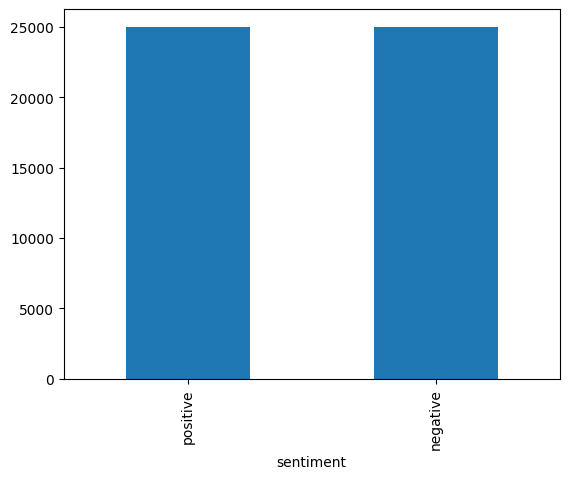

In [6]:
df['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='sentiment'>

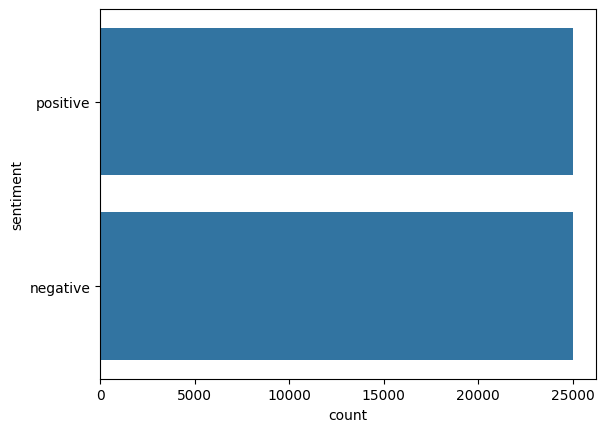

In [7]:
#Using Seaborn to plot

import seaborn as sns

sns.countplot(df['sentiment'])

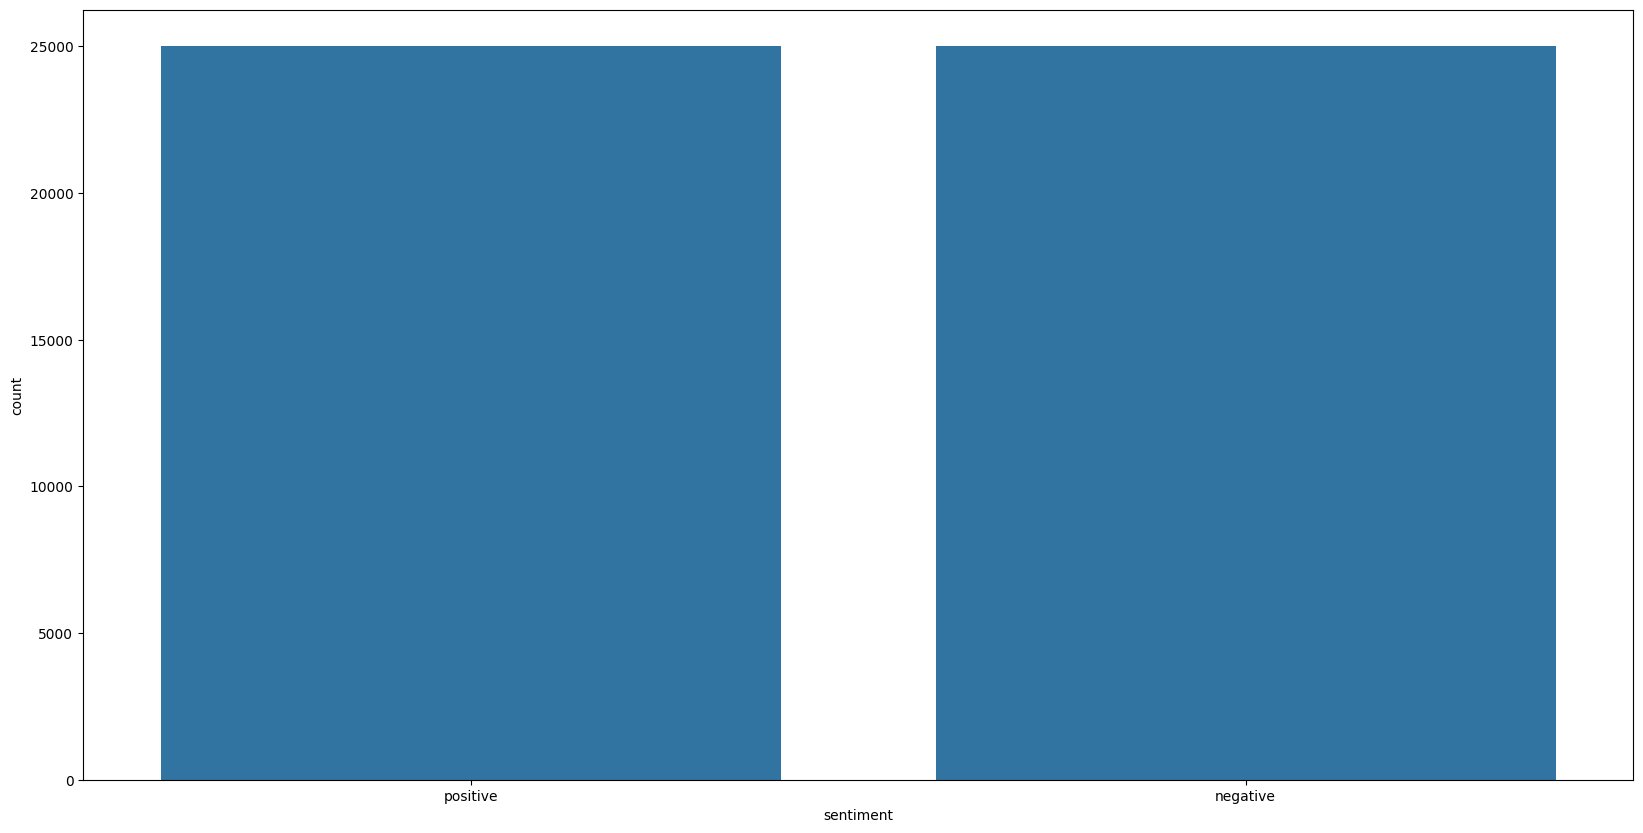

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.countplot(x='sentiment', data=df)
plt.show()

In [9]:
df['review'].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [10]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d